# 第6章 : カテゴリーで比較する、カテゴリカルプロット

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names() # seabornで利用可能なデータセットの取得

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic') # titanic読み込み

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.shape

(891, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df['survived'].unique(), df['alive'].unique()

(array([0, 1]), array(['no', 'yes'], dtype=object))

In [8]:
df[['survived', 'alive']].value_counts()

survived  alive
0         no       549
1         yes      342
Name: count, dtype: int64

In [9]:
df[['pclass', 'class']].value_counts()

pclass  class 
3       Third     491
1       First     216
2       Second    184
Name: count, dtype: int64

In [10]:
df[['embarked', 'embark_town']].value_counts()

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

In [11]:
df[['who', 'adult_male']].value_counts()

who    adult_male
man    True          537
woman  False         271
child  False          83
Name: count, dtype: int64

In [12]:
df[(df['sibsp'] == 0) & (df['parch'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
df[(df['sibsp'] == 0) & (df['parch'] == 0)]['alone'].unique()

array([ True])

これより、sibsp, parchがともに0であるときにaloneがTrueになっていることがわかる

In [14]:
df[(df['sibsp'] != 0) | (df['parch'] != 0)]['alone'].unique()

array([False])

以上の調査からalive, class, adult_male, embark_town, aloneのカラムは必要ないと判断して削除

In [15]:
df.drop(['alive', 'class', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)

In [16]:
df.shape

(891, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


In [18]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

In [19]:
df['deck'].value_counts().sort_index()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64

In [20]:
df.groupby('deck')['survived'].describe()

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\2555788981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('deck')['survived'].describe()


,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [21]:
df.drop('deck', axis=1, inplace=True) # 欠損が多すぎるから削除

In [22]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [23]:
df.groupby('embarked')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [24]:
df[(df['survived'] == 1) & (df['pclass'] == 1) & (df['sex'] == 'female') & (df['fare'] == 80) & (df['sibsp'] == 0) & (df['parch'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [25]:
df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['fare'] == 80) & (df['sibsp'] == 0) & (df['parch'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [26]:
df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
11,1,1,female,58.0,0,0,26.5500,S,woman
61,1,1,female,38.0,0,0,80.0000,NaN,woman
177,0,1,female,50.0,0,0,28.7125,C,woman
194,1,1,female,44.0,0,0,27.7208,C,woman
195,1,1,female,58.0,0,0,146.5208,C,woman
218,1,1,female,32.0,0,0,76.2917,C,woman
256,1,1,female,NaN,0,0,79.2000,C,woman
257,1,1,female,30.0,0,0,86.5000,S,woman
258,1,1,female,35.0,0,0,512.3292,C,woman
269,1,1,female,35.0,0,0,135.6333,S,woman


In [27]:
vc1 = df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0)]['embarked'].value_counts()
vc1

embarked
C    18
S    14
Name: count, dtype: int64

In [28]:
vc2 = df['embarked'].value_counts()[[1, 0]]
vc2

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\2735960778.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vc2 = df['embarked'].value_counts()[[1, 0]]


embarked
C    168
S    644
Name: count, dtype: int64

In [29]:
vc1 / vc2

embarked
C    0.107143
S    0.021739
Name: count, dtype: float64

In [30]:
# これまでの情報から欠損を埋める
df.loc[61, 'embarked'] = 'C'
df.loc[829, 'embarked'] = 'C'

In [31]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
dtype: int64

続いて、年齢の欠損を埋める

In [32]:
df[df['age'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
5,0,3,male,NaN,0,0,8.4583,Q,man
17,1,2,male,NaN,0,0,13.0000,S,man
19,1,3,female,NaN,0,0,7.2250,C,woman
26,0,3,male,NaN,0,0,7.2250,C,man
28,1,3,female,NaN,0,0,7.8792,Q,woman


In [33]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [34]:
df[df['age'].isnull()]['who'].unique()

array(['man', 'woman'], dtype=object)

これよりageが欠損しているデータにはman, womanだけでchildがないとわかる

In [35]:
df[df['who'] == 'child']['age'].max()

np.float64(15.0)

これよりchildのmaxが15であるため、ageの欠損を埋めるときに少なくとも15以上であるとわかる

In [36]:
df_adult = df[15 < df['age']]
df_adult.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
555,0,1,male,62.0,0,0,26.5500,S,man
733,0,2,male,23.0,0,0,13.0000,S,man
675,0,3,male,18.0,0,0,7.7750,S,man
707,1,1,male,42.0,0,0,26.2875,S,man
56,1,2,female,21.0,0,0,10.5000,S,woman


In [37]:
df_adult['age'].max()

np.float64(80.0)

Text(0.5, 1.0, 'adultの年齢分布')

C:\Users\masuda.yuya\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\masuda.yuya\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\masuda.yuya\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\masuda.yuya\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\masuda.yuya\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing fro

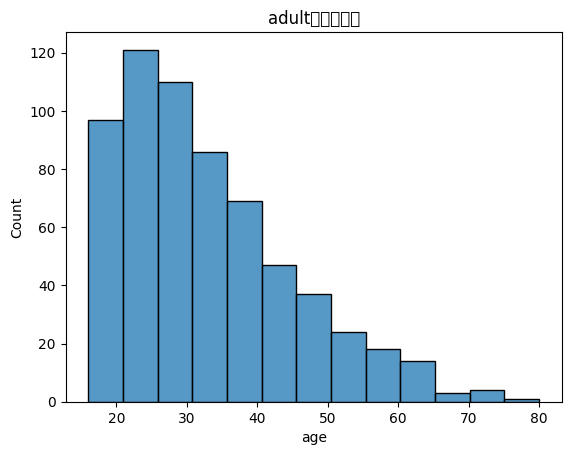

In [38]:
sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
plt.title('adultの年齢分布')

In [39]:
df_adult['age'].mean()

np.float64(32.76782884310618)

In [40]:
# 日本語を使えるように設定変更
sns.set_theme(font='MS GOTHIC', context='talk', style='darkgrid')
# context : paper, notebook, talk, poster
# style : dark, darkgrid, white, whitegrid, ticks

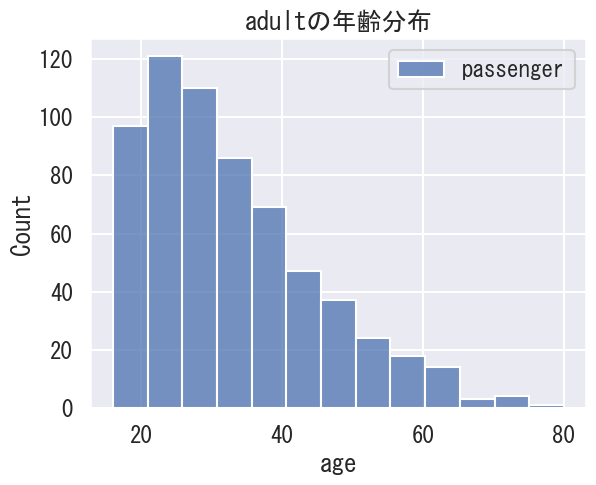

In [41]:
sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
plt.title('adultの年齢分布')
plt.legend()

plt.show()

続いて、年齢とチケットクラス、性別の関係をみていく

In [42]:
df_adult.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman


In [43]:
df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


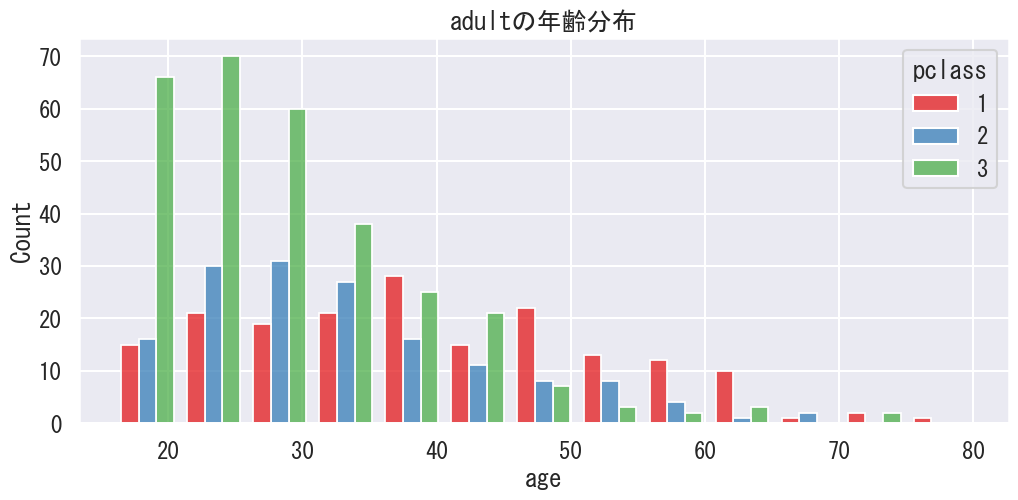

In [44]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', palette='Set1', multiple='dodge', shrink=0.8)
plt.title('adultの年齢分布')

plt.show()

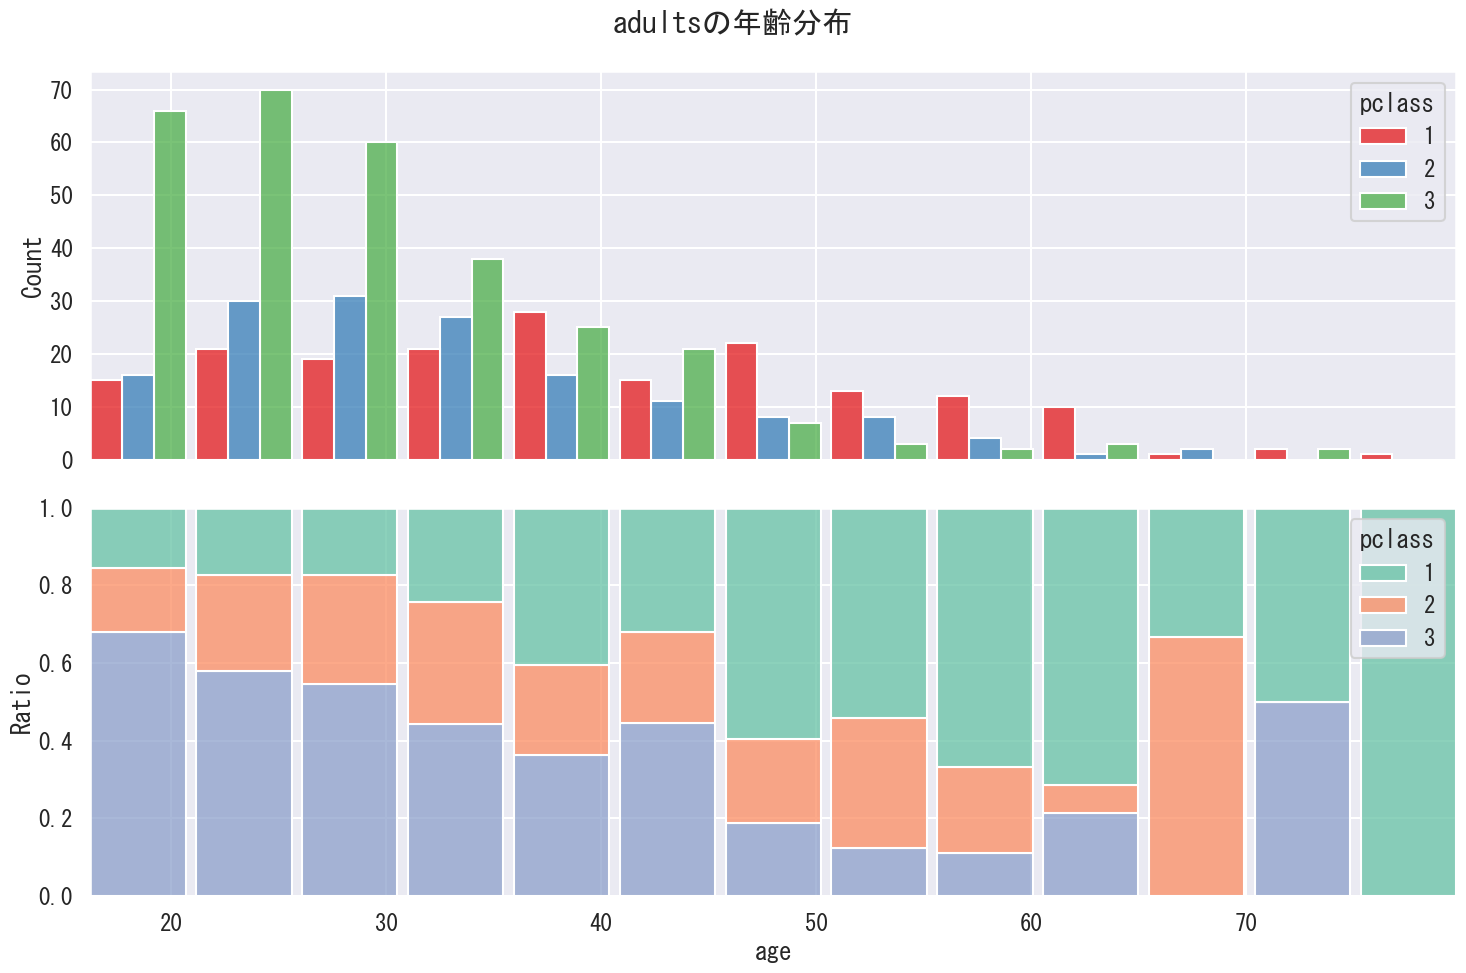

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='dodge', palette='Set1', shrink=0.9, ax=axes[0])
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='fill', palette='Set2', shrink=0.9, ax=axes[1])
axes[1].set_ylabel('Ratio')
axes[0]

fig.suptitle("adultsの年齢分布")
plt.show()

相関関係のDataFrameを表示

In [46]:
df_adult.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.390467,0.010352,0.088154,0.074216,0.296918
pclass,-0.390467,1.000000,-0.355523,-0.111805,-0.024458,-0.552295
age,0.010352,-0.355523,1.000000,-0.050841,0.037404,0.110403
sibsp,0.088154,-0.111805,-0.050841,1.000000,0.280791,0.221493
parch,0.074216,-0.024458,0.037404,0.280791,1.000000,0.217429
fare,0.296918,-0.552295,0.110403,0.221493,0.217429,1.000000


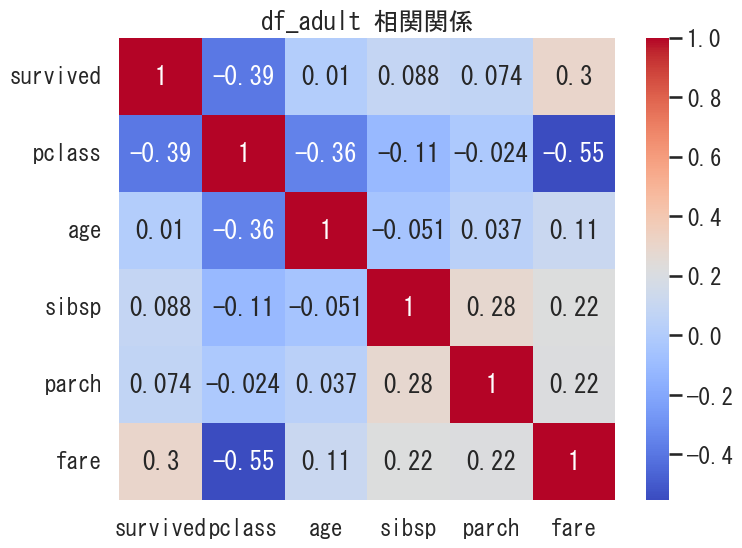

In [47]:
# 相関関係をheatmapで可視化
plt.figure(figsize=(8, 6))
sns.heatmap(df_adult.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('df_adult 相関関係')
plt.show()

In [48]:
df.dropna(axis=0, inplace=True)

In [49]:
df.shape

(714, 9)

In [50]:
df.isnull().sum().sum()

np.int64(0)

In [51]:
# nullを除いたデータを保存
df.to_csv('titanic_non_null.csv', index=False)

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


In [53]:
df.groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,132.0,31.105455,15.566968,0.42,21.75,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0


## catplot(カテゴリカルプロット)

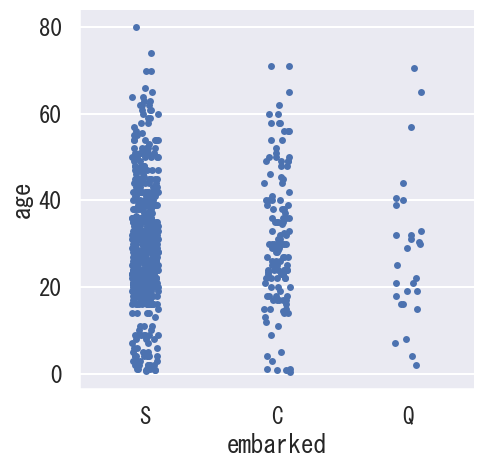

In [54]:
sns.catplot(data=df, x='embarked', y='age')
plt.show()

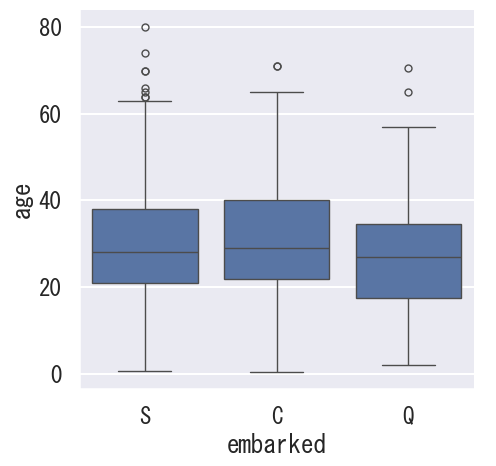

In [55]:
sns.catplot(data=df, x='embarked', y='age', kind='box')
plt.show()

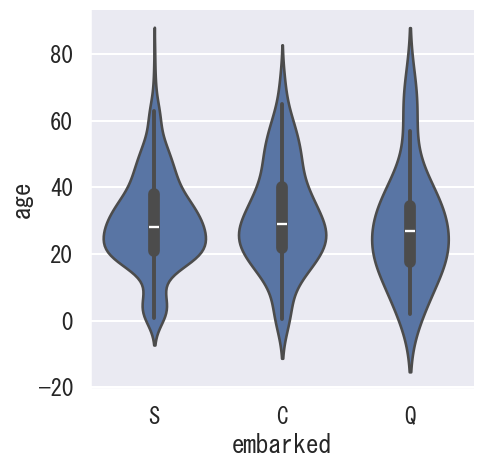

In [56]:
sns.catplot(data=df, x='embarked', y='age', kind='violin')
plt.show()

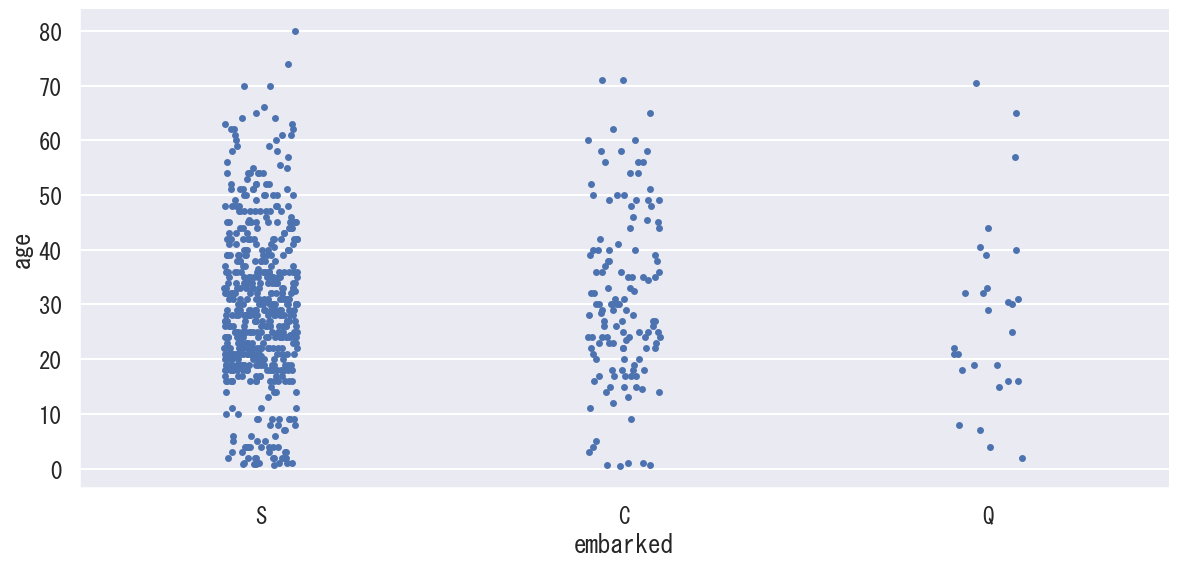

In [57]:
sns.catplot(data=df, x='embarked', y='age', height=6, aspect=2) # サイズの変更
plt.show()

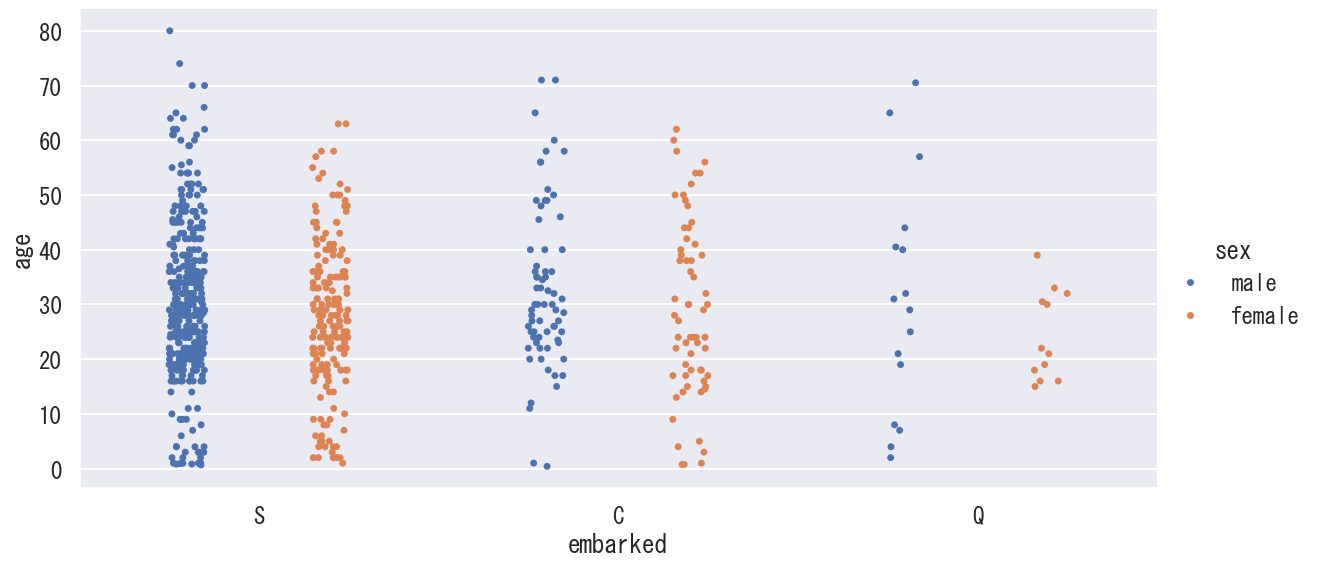

In [58]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', dodge=True, height=6, aspect=2)
plt.show()

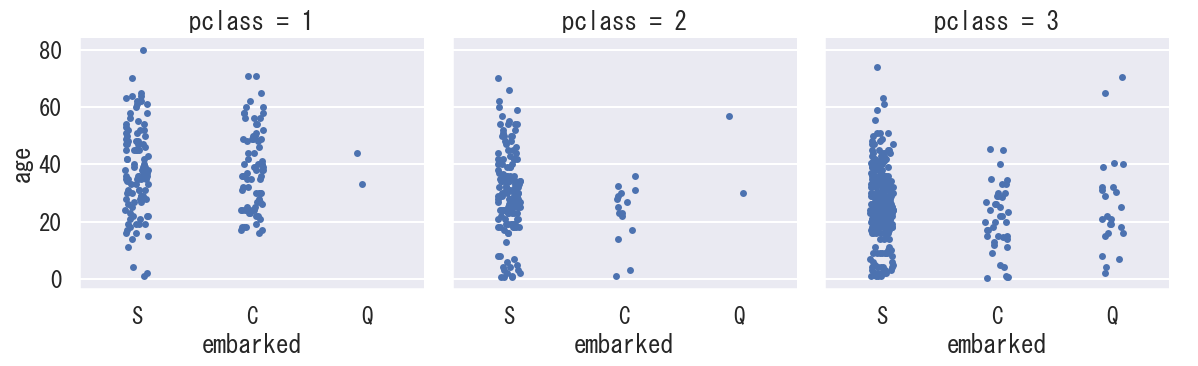

In [59]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass')
plt.show()

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\2142494723.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Blues') # 色の変更


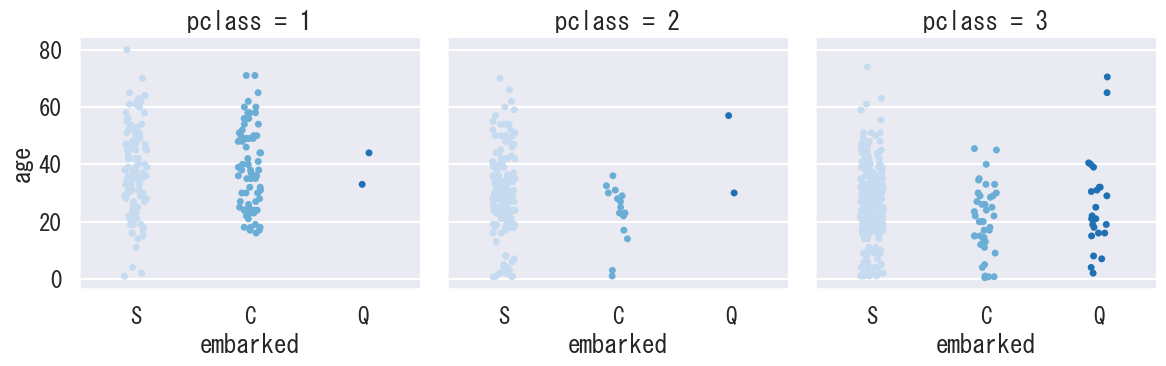

In [60]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Blues') # 色の変更
plt.show()

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\3806585000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette="Reds")


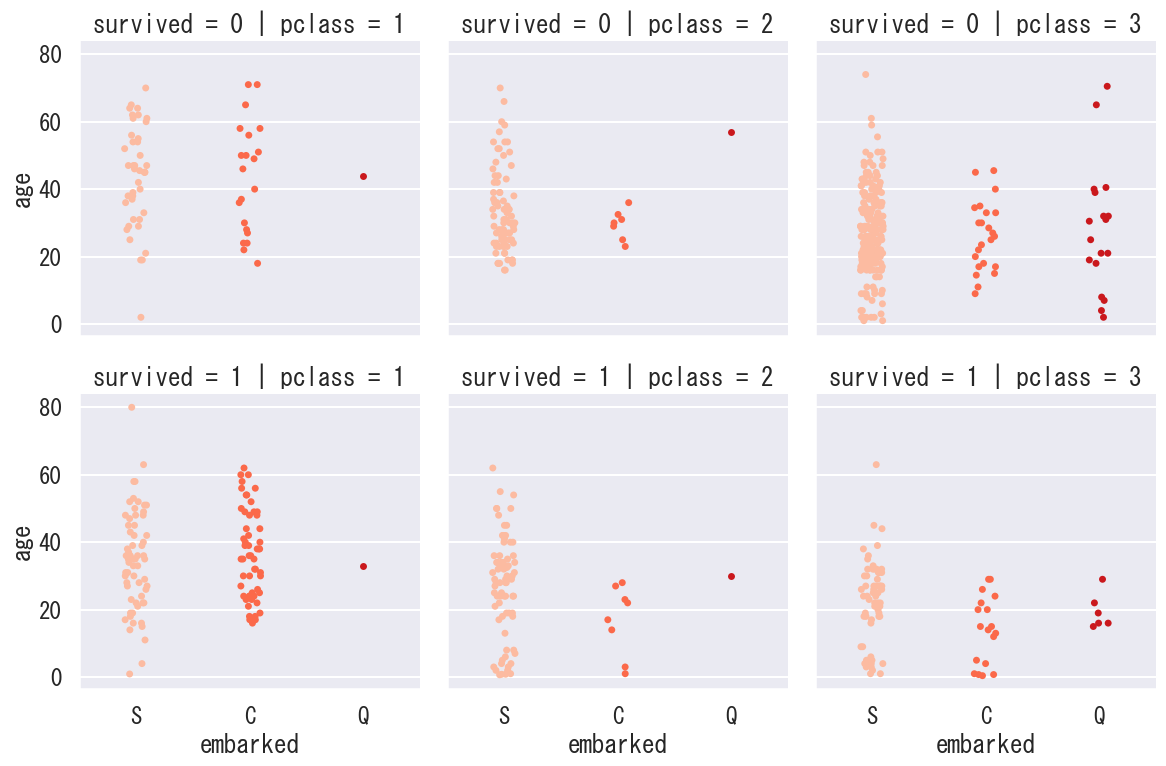

In [61]:
# columnに加えてrowも設定
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette="Reds")
plt.show()

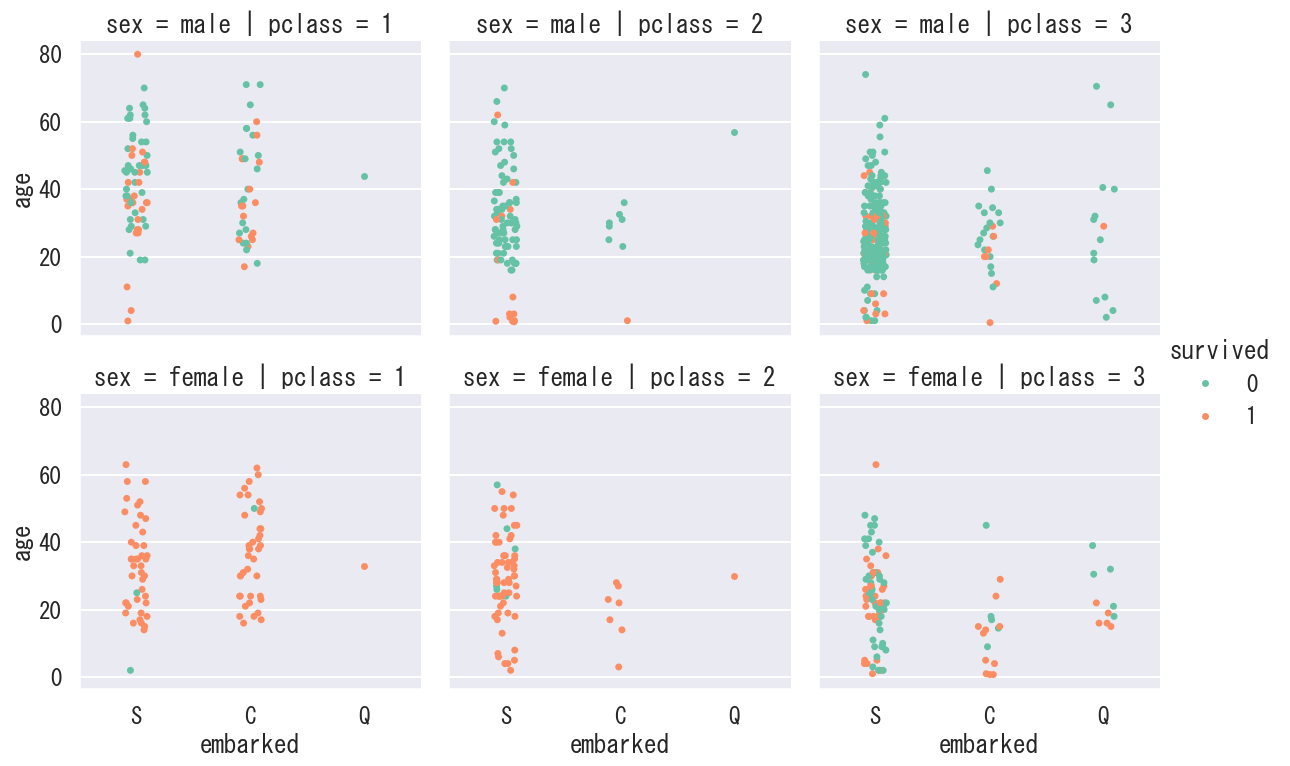

In [62]:
# rowをhueに変更
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='sex', hue='survived', palette="Set2")
plt.show()

## stripplot
複数の行、列を指定するときはcatplotで、単独の場合はstripplot

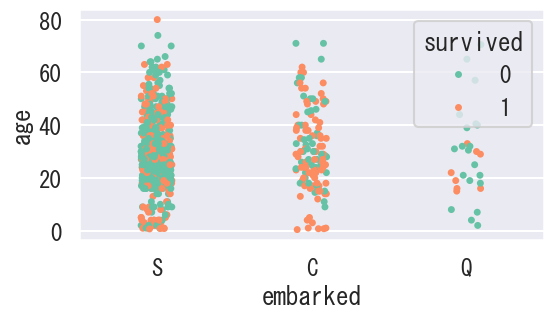

In [63]:
plt.figure(figsize=(6, 3))
sns.stripplot(data=df, x='embarked', y='age', hue='survived', palette="Set2")
plt.show()

## countplot

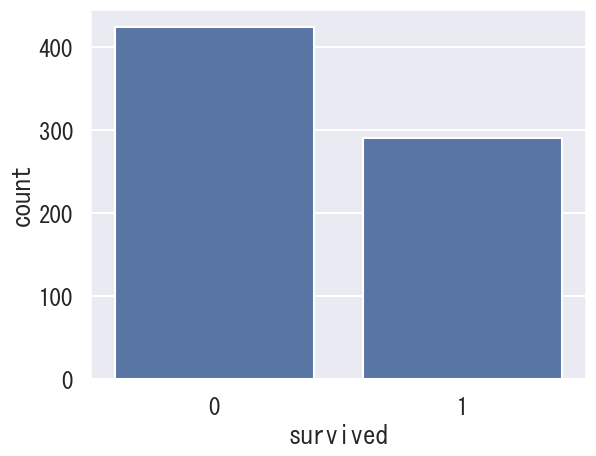

In [64]:
sns.countplot(data=df, x='survived')
plt.show()

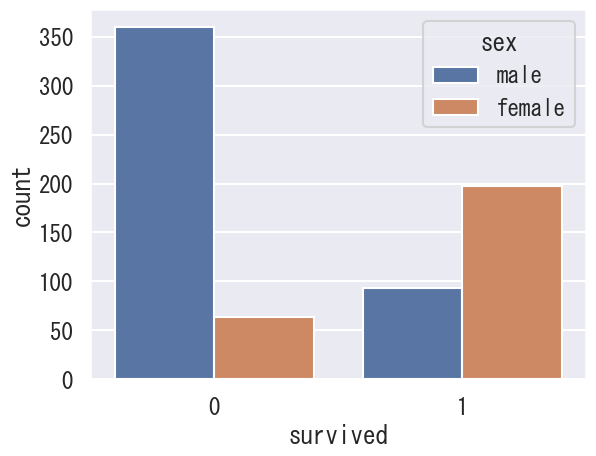

In [65]:
sns.countplot(data=df, x='survived', hue='sex')
plt.show()

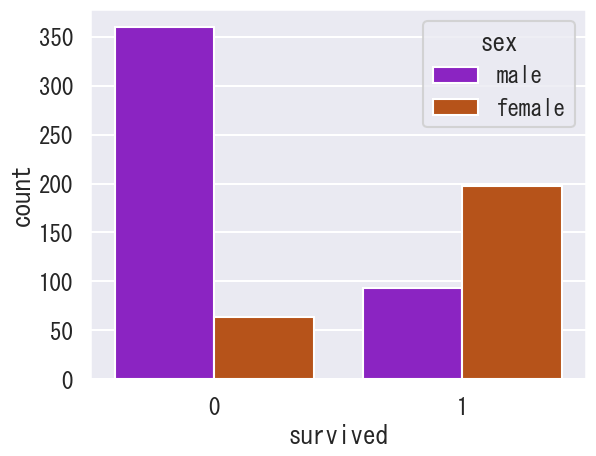

In [66]:
sns.countplot(data=df, x='survived', hue='sex', palette='gnuplot')
plt.show()

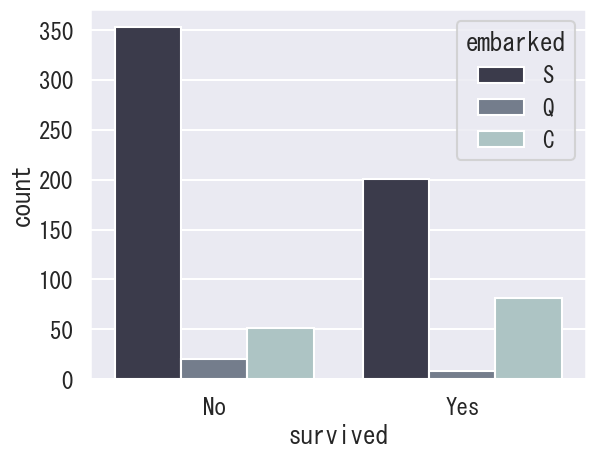

In [68]:
sns.countplot(data=df, x='survived', hue='embarked', palette='bone')
plt.xticks([0, 1], ['No', 'Yes']) # x軸の各値の名前変更
plt.show()

## barplot

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\3216857287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='embarked', y='age', palette='Set2')


<Axes: xlabel='embarked', ylabel='age'>

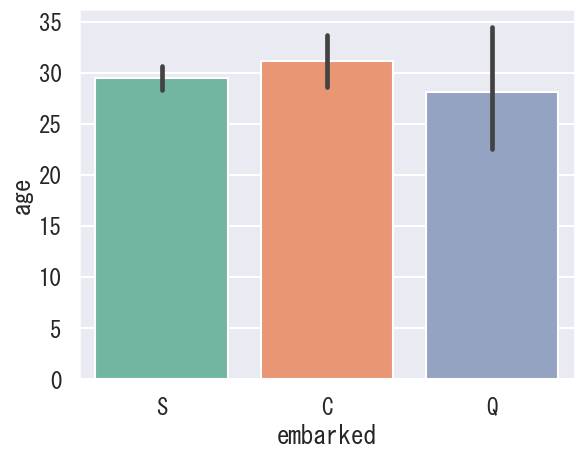

In [69]:
sns.barplot(data=df, x='embarked', y='age', palette='Set2')

barplotで表示される黒い棒は信頼性を表している。分散の値などを求めて確からしさを計算していると思われる。
エラーバーが長いと信頼性が低い。また、エラーバーが長いのはサンプル数が少ないなどの理由で変動の幅が大きいと予想される。サンプル数が多いほどエラーバーが短くなる

In [70]:
df.groupby('embarked')['age'].mean() # エラーバーが平均値となっていることを確認

embarked
C    31.105455
Q    28.089286
S    29.445397
Name: age, dtype: float64

barplotは、デフォルトで平均値になっている。カテゴリーごとの平均値の違いを見比べる場合にこのbarplotを使えばよい

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\1232622049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='embarked', y='age', palette='Set2')


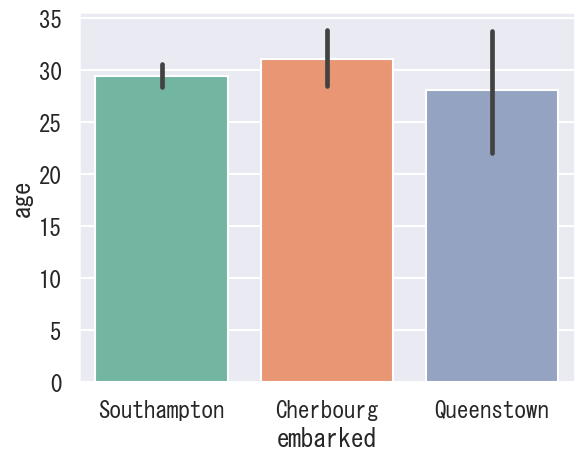

In [73]:
# x軸の名前変更
sns.barplot(data=df, x='embarked', y='age', palette='Set2')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_34916\2873031631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='embarked', y='age', palette='Set2')


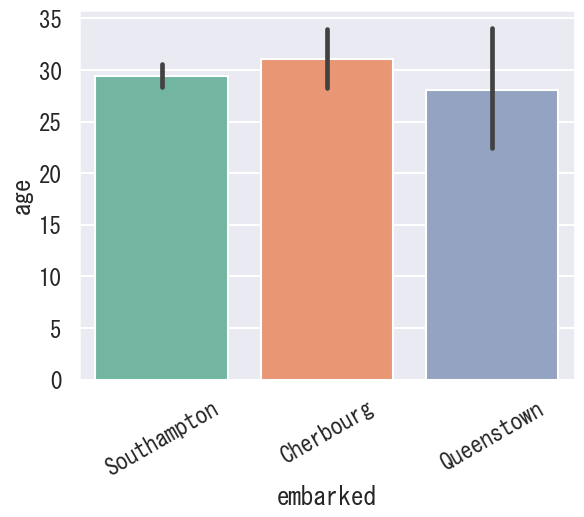

In [75]:
# 目盛りの文字列を回転させる
sns.barplot(data=df, x='embarked', y='age', palette='Set2')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], rotation=30)
plt.show()

## boxplot
日本語で箱ひげ図のこと

<Axes: xlabel='pclass', ylabel='fare'>

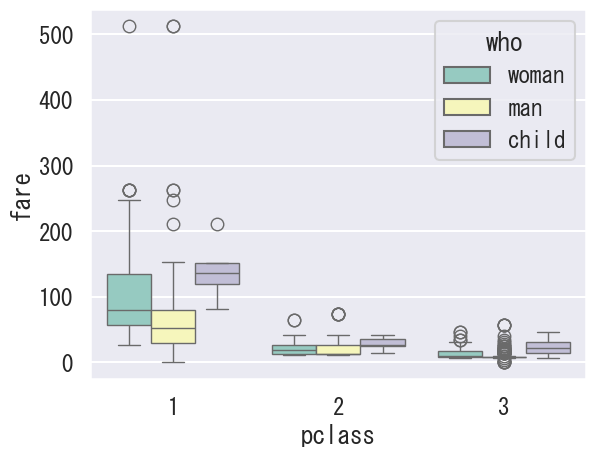

In [76]:
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3')

## violinplot
バイオリンプロットは、膨らみが割合を表していて和が1になるようにしている

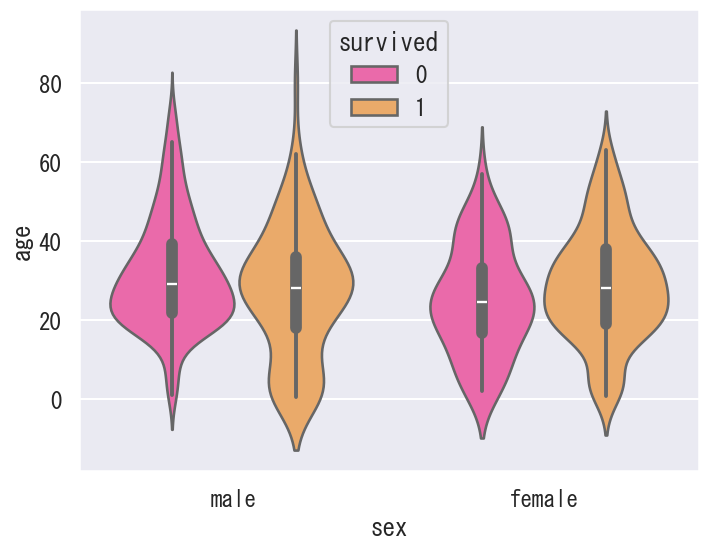

In [79]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring')
plt.show()

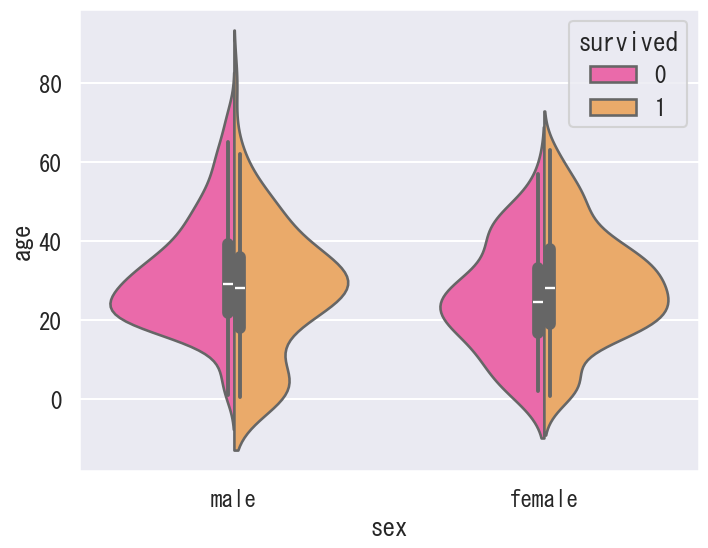

In [80]:
# 2値の場合はsplitを使う
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True)
plt.show()

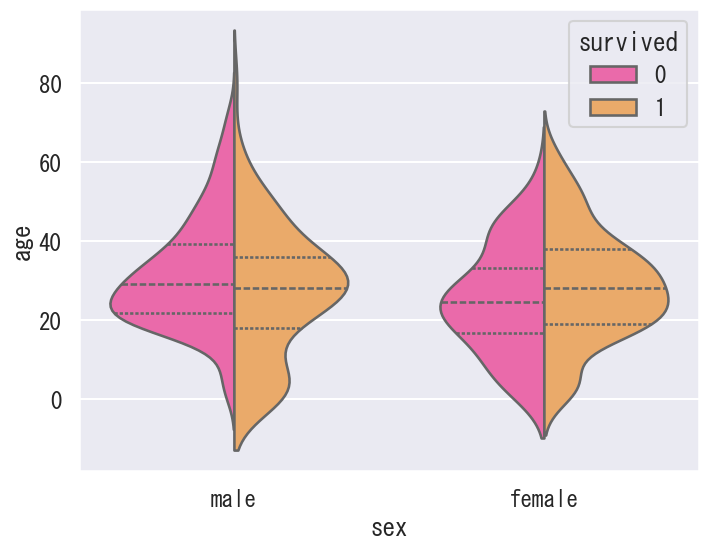

In [81]:
# 四分位を可視化
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True, inner='quartile')
plt.show()

## swarmplot
swarmは群れを意味する

<Axes: xlabel='sex', ylabel='age'>

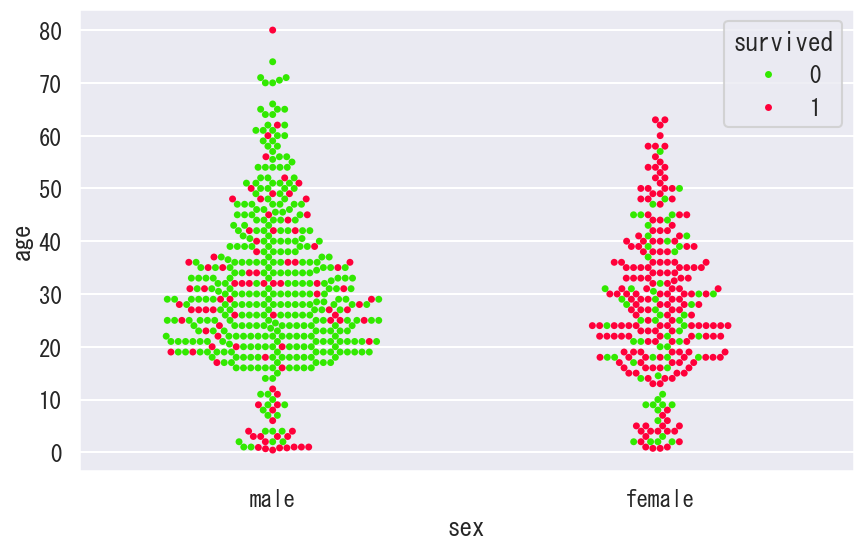

In [82]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism')